Pasar a la IA el cacho de imagen que detecta que es una cara en el X y en la Y le pasamos un número que esté asociado a cada individuo

pip install opencv-contrib-python

In [15]:
import pathlib
import cv2 as cv


path=str(pathlib.Path().resolve())

In [16]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + \
                                'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + \
                                'haarcascade_eye.xml')

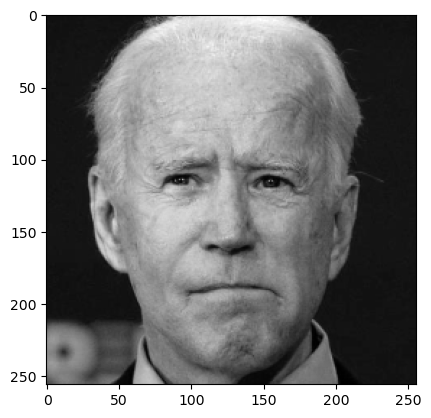

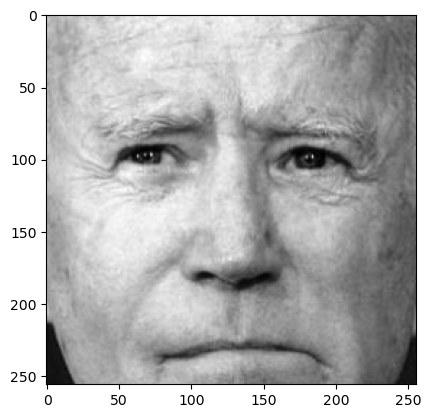

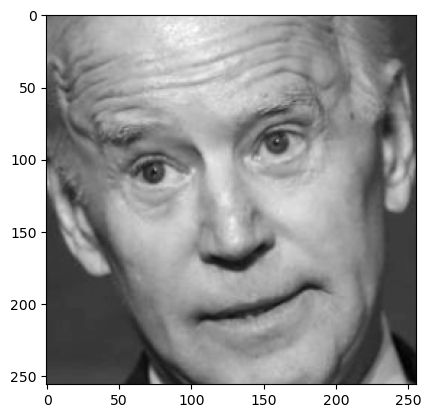

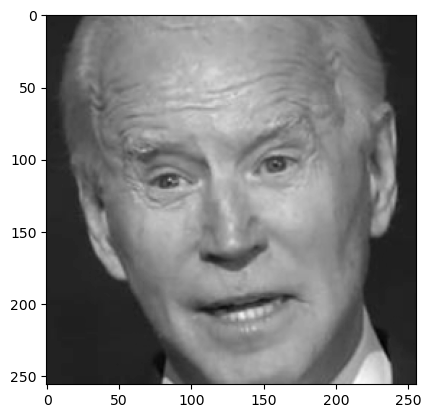

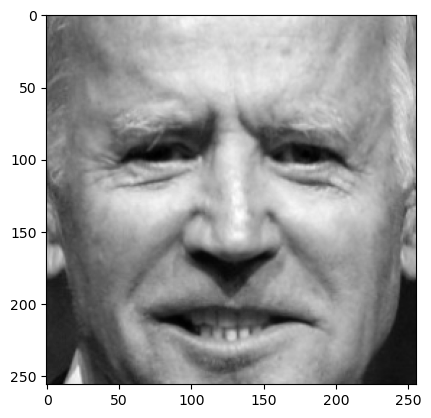

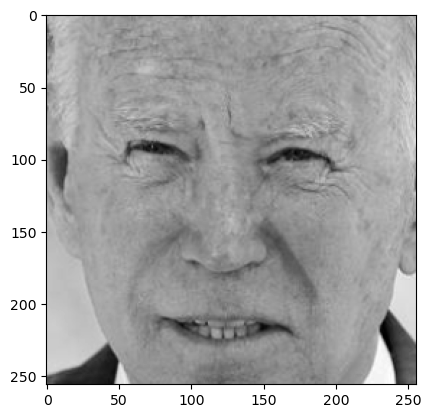

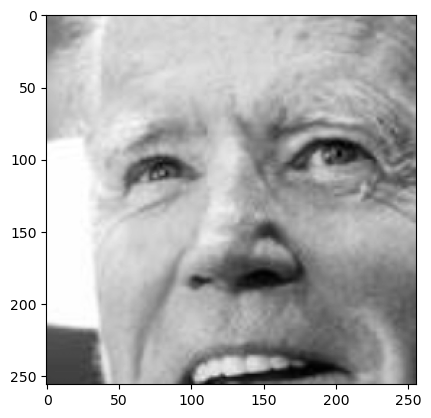

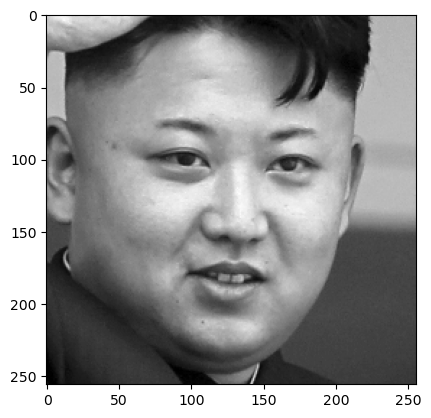

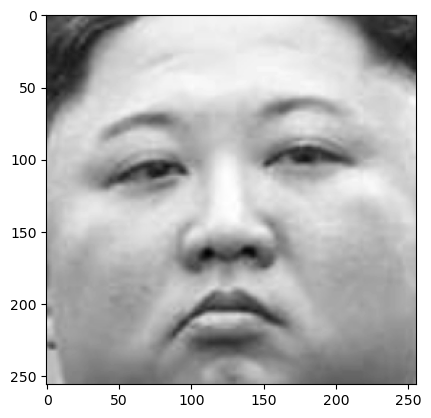

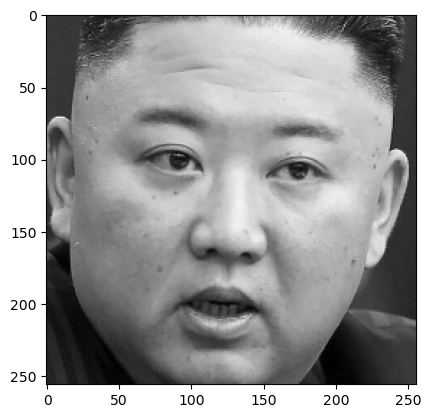

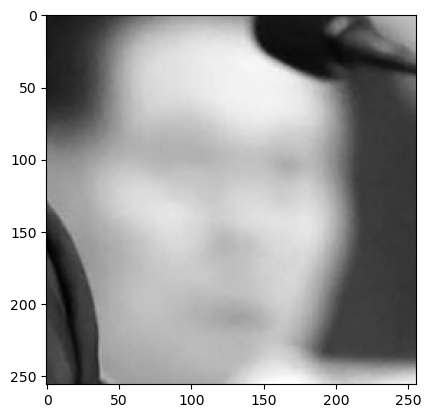

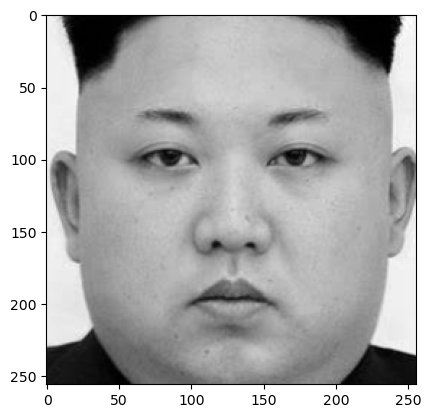

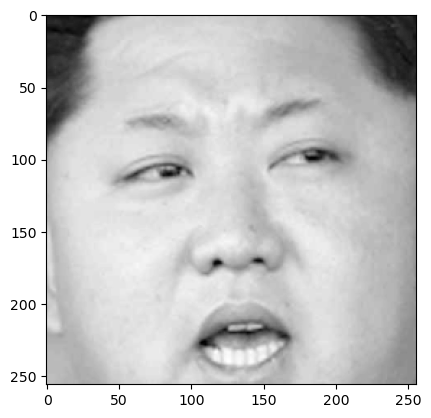

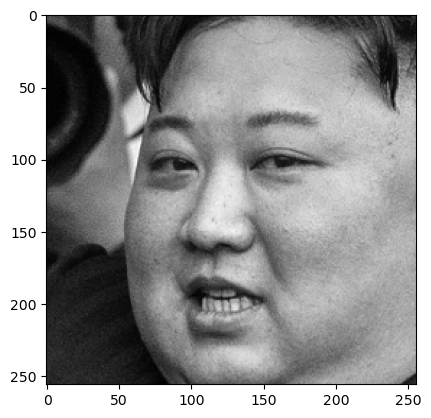

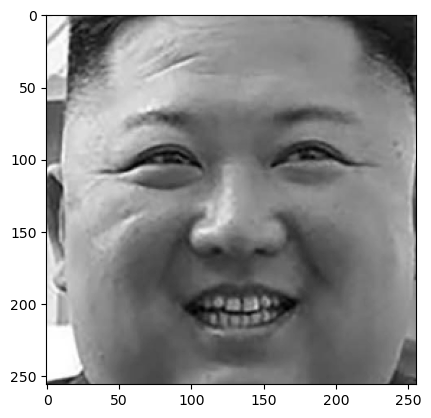

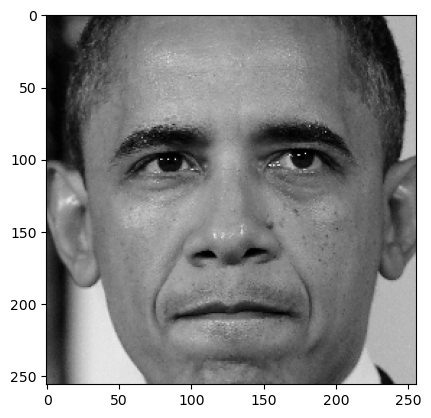

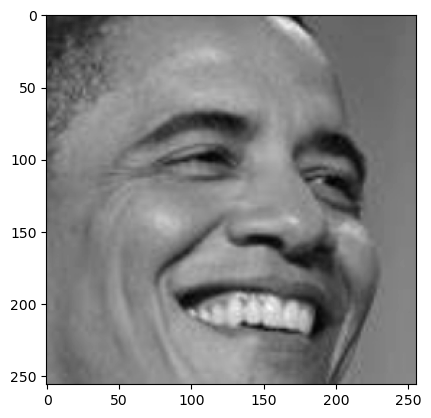

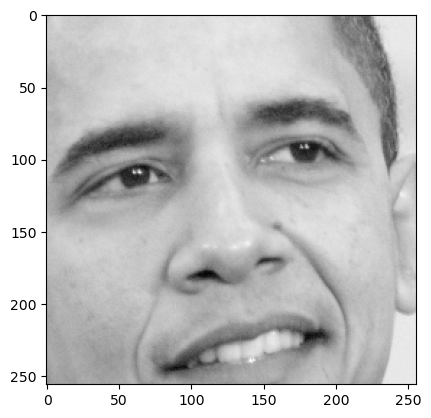

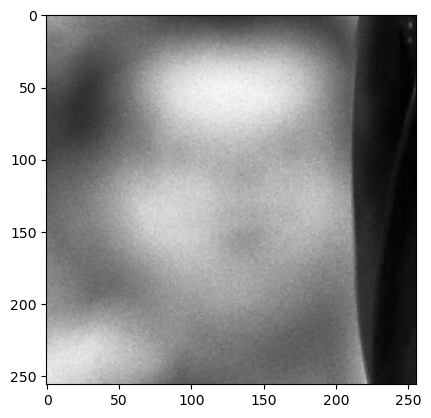

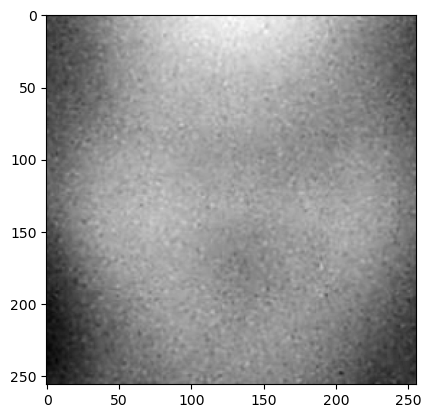

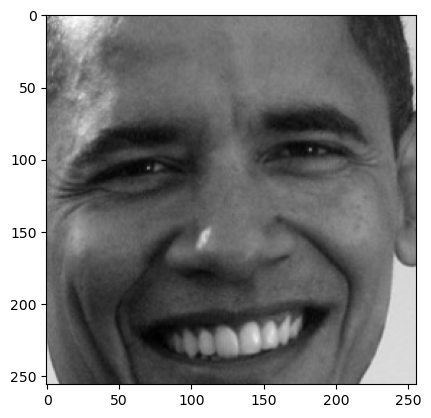

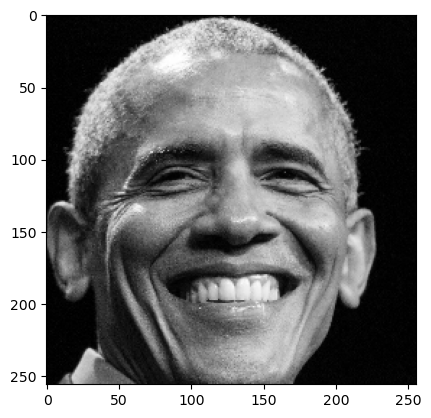

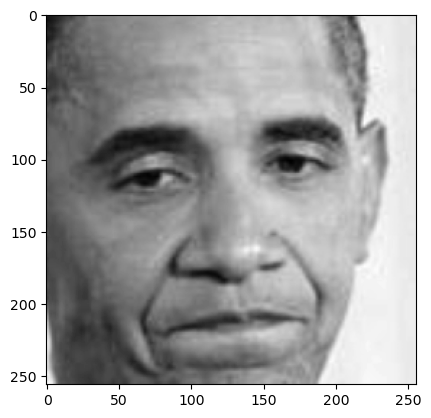

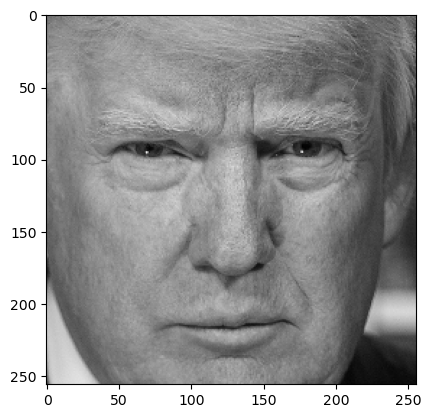

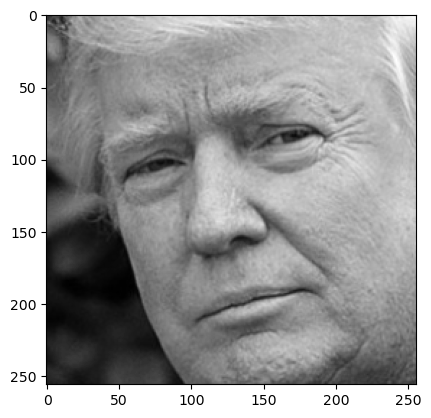

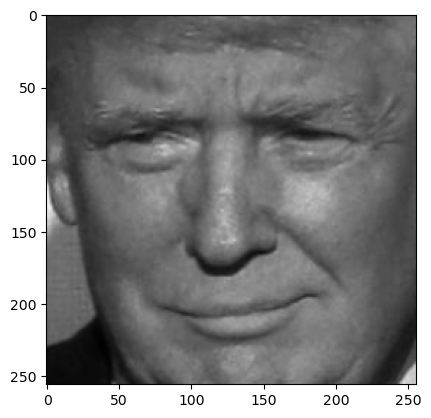

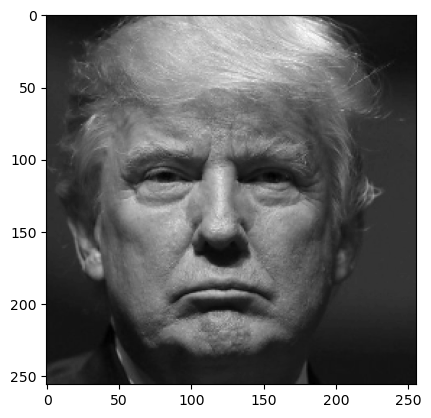

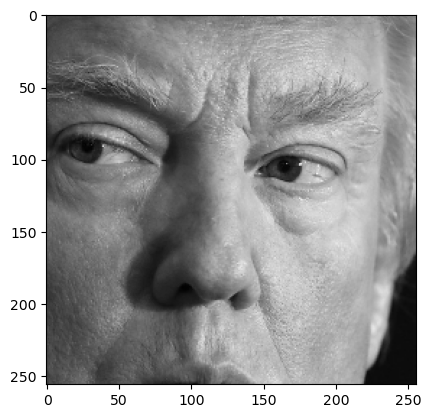

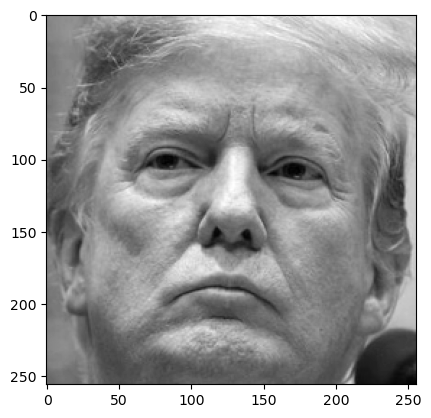

In [17]:
import os
from matplotlib import pyplot as plt
import pandas as pd


df = pd.DataFrame()
caras={}
titulos=[]
ind=0
for index,(dirpath, dirnames, filenames) in enumerate(os.walk(path+"/Imagenes/")):
    for filename in filenames:
        
        img = (cv.imread(os.path.join(dirpath, filename)))
        allcaras = face_cascade.detectMultiScale(cv.cvtColor(img,cv.COLOR_BGR2GRAY), 1.8,3,minSize=[128,128],flags=cv.CASCADE_SCALE_IMAGE)
        cop = img.copy()
        for (x,y,w,h) in allcaras:
            cara=cop[y:y+h, x:x+w]
            cara = cv.cvtColor(cv.resize(cara,[256,256],cv.INTER_LINEAR),cv.COLOR_BGR2GRAY)
            plt.imshow(cara,cmap="gray")
            caras[ind] = {"img":cara,"ind":index-1}
            plt.show(block=False)
            ind+=1
    titulos = dirnames if len(dirnames)>0 else titulos

In [18]:
modelo = cv.face.LBPHFaceRecognizer_create()

In [19]:
lista = [dic for dic in caras.values()]

In [20]:
import numpy as np


modelo.train(np.array([dic.get('img') for dic in lista],dtype=int),np.array([dic.get('ind') for dic in lista],dtype=int))

In [21]:
def get_image(v,u_path=True):
    if u_path:
        img = cv.imread(path+v)
    else:
        img = v
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img=cv.resize(img,[1024,1024])
    plt.imshow(img,cmap="gray")
    return img

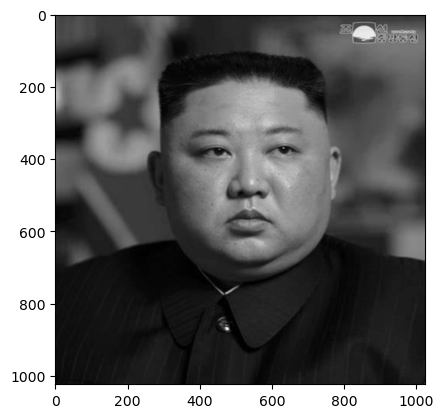

In [22]:
imgK = get_image("/adivinaKim.jpg")

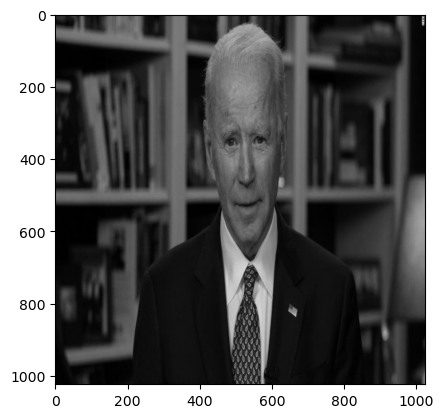

In [23]:
imgB = get_image("/adivinaBiden.jpg")

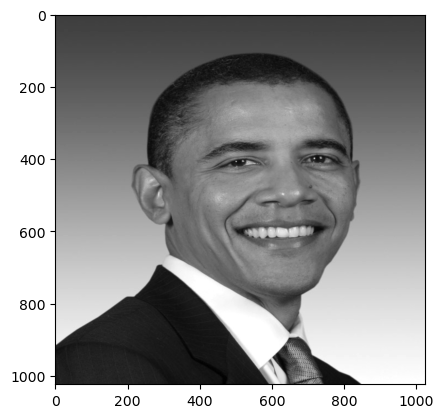

In [24]:
imgO = get_image("/adivinaObama.jpg")

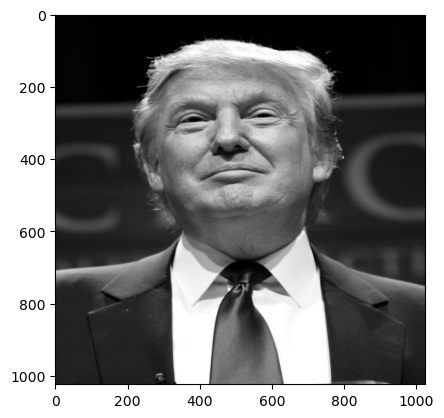

In [25]:
imgT = get_image("/adivinaTrump.jpg")

In [26]:
def predict_face(img,model,scale_factor=1.9,minNeighbors=3,ex=True):

    allcaras = face_cascade.detectMultiScale(img, scale_factor,minNeighbors,minSize=[128,128],flags=cv.CASCADE_SCALE_IMAGE)

    cop = img.copy()
    for (x,y,w,h) in allcaras:
        cara=cop[y:y+h, x:x+w]
        cara=cv.resize(cara,[256,256],interpolation=cv.INTER_LINEAR)
        if ex:
            plt.imshow(cara,cmap="gray")
            plt.show(block=False)

    try:
        if cara is not None:
            values=model.predict(cara)
            print(values)
            v = [v for i,v in enumerate(titulos) if i==values[0]][0]
            print(f"Es:{v}")
            return v,cara,(x,y,w,h)
    except:
        if ex:
            print("No se encontró cara cambie el scale_factor y el minNeighbours")

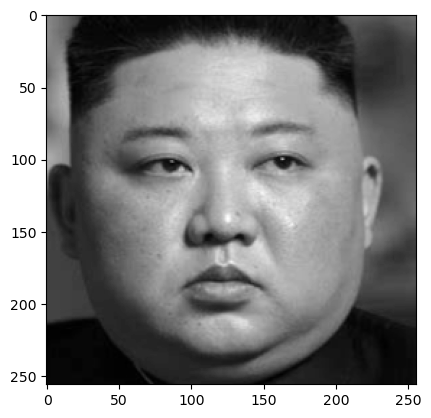

(1, 56.393387776265165)
Es:Kim


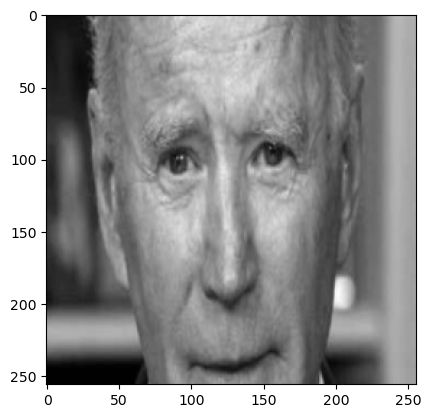

(0, 70.20854963587158)
Es:Biden


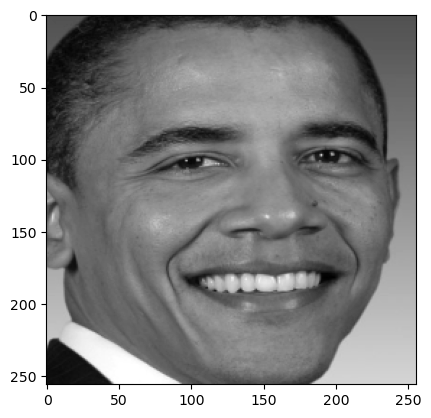

(2, 60.967462723472956)
Es:Obama


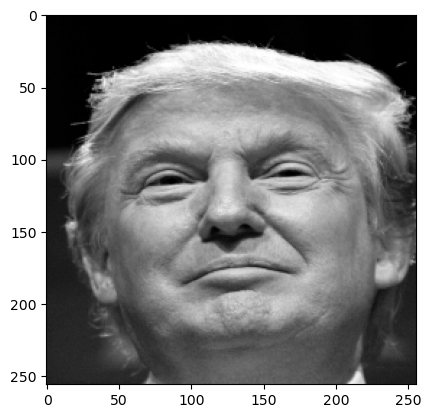

(3, 54.07268095739754)
Es:Trump


('Trump',
 array([[ 1,  2,  2, ...,  2,  2,  1],
        [ 2,  2,  1, ...,  1,  2,  1],
        [ 2,  2,  3, ...,  2,  1,  1],
        ...,
        [39, 34, 35, ..., 28, 29, 27],
        [33, 32, 32, ..., 31, 29, 27],
        [34, 35, 33, ..., 26, 29, 31]], dtype=uint8),
 (186, 25, 594, 594))

In [27]:
predict_face(imgK,modelo)
predict_face(imgB,modelo)
predict_face(imgO,modelo)
predict_face(imgT,modelo)